为什么要学习分层索引MultiIndex
- 分层索引：在一个轴向上拥有多个索引层级，可以表达更高维度数据的形式
- 可以更方便的进行数据筛选，如果有序则性能更好
- groupby等操作的结果，如果是多key，如果是分层索引，需要会使用
- 一般不需要自己创建分层索引（MultiIndex有构造函数，但一般不用）

演示数据：阿里巴巴、百度、京东三家公司的20天的股票
数据来源：英为财经
https://cn.investing.com/

本次演示提纲：
    1. series的分层索引MultiIndex
    2. series有多层索引怎么样筛选数据
    3. df的多层索引MultiIndex
    4. df的多层索引怎么样筛选数据

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df=pd.read_csv('./data/stock/stock.csv')
df.head()

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅
0,2023/3/27,BABA,86.12,87.13,88.22,85.50,18.18M,-0.90%
1,2023/3/24,BABA,86.90,85.87,88.11,85.63,20.35M,0.44%
2,2023/3/23,BABA,86.52,87.68,88.38,85.26,26.79M,3.43%
3,2023/3/22,BABA,83.65,84.84,85.39,83.51,21.08M,-0.06%
4,2023/3/21,BABA,83.70,82.46,84.09,82.00,16.44M,3.33%


In [7]:
df.shape

(60, 8)

In [3]:
df['公司'].unique()

array(['BABA', 'JD', 'BAIDU'], dtype=object)

In [12]:
df.index

RangeIndex(start=0, stop=60, step=1)

In [4]:
df.groupby('公司')['收盘'].mean()

公司
BABA      85.4430
BAIDU    141.3250
JD        42.1835
Name: 收盘, dtype: float64

一、series的分层索引MultiIndex

In [19]:
ser=df.groupby(['公司','日期'])['收盘'].mean()
ser

公司     日期       
BABA   2023/2/28     87.79
       2023/3/1      89.95
       2023/3/10     82.96
       2023/3/13     82.90
       2023/3/14     83.85
       2023/3/15     81.51
       2023/3/16     82.22
       2023/3/17     81.67
       2023/3/2      89.75
       2023/3/20     81.00
       2023/3/21     83.70
       2023/3/22     83.65
       2023/3/23     86.52
       2023/3/24     86.90
       2023/3/27     86.12
       2023/3/3      89.70
       2023/3/6      89.62
       2023/3/7      88.73
       2023/3/8      86.95
       2023/3/9      83.37
BAIDU  2023/2/28    134.80
       2023/3/1     145.00
       2023/3/10    129.50
       2023/3/13    134.00
       2023/3/14    129.00
       2023/3/15    133.60
       2023/3/16    125.10
       2023/3/17    142.20
       2023/3/2     141.90
       2023/3/20    143.50
       2023/3/21    148.10
       2023/3/22    146.80
       2023/3/23    150.90
       2023/3/24    154.40
       2023/3/27    149.50
       2023/3/3     149.40
       2023

多维索引中，空白的意思就是：使用上面的值

In [15]:
ser.index

MultiIndex([( 'BABA', '2023/2/28'),
            ( 'BABA',  '2023/3/1'),
            ( 'BABA', '2023/3/10'),
            ( 'BABA', '2023/3/13'),
            ( 'BABA', '2023/3/14'),
            ( 'BABA', '2023/3/15'),
            ( 'BABA', '2023/3/16'),
            ( 'BABA', '2023/3/17'),
            ( 'BABA',  '2023/3/2'),
            ( 'BABA', '2023/3/20'),
            ( 'BABA', '2023/3/21'),
            ( 'BABA', '2023/3/22'),
            ( 'BABA', '2023/3/23'),
            ( 'BABA', '2023/3/24'),
            ( 'BABA', '2023/3/27'),
            ( 'BABA',  '2023/3/3'),
            ( 'BABA',  '2023/3/6'),
            ( 'BABA',  '2023/3/7'),
            ( 'BABA',  '2023/3/8'),
            ( 'BABA',  '2023/3/9'),
            ('BAIDU', '2023/2/28'),
            ('BAIDU',  '2023/3/1'),
            ('BAIDU', '2023/3/10'),
            ('BAIDU', '2023/3/13'),
            ('BAIDU', '2023/3/14'),
            ('BAIDU', '2023/3/15'),
            ('BAIDU', '2023/3/16'),
            ('BAIDU', '2023/

In [16]:
# unstack把二级索引变成列
ser.unstack()

日期,2023/2/28,2023/3/1,2023/3/10,2023/3/13,2023/3/14,2023/3/15,2023/3/16,2023/3/17,2023/3/2,2023/3/20,2023/3/21,2023/3/22,2023/3/23,2023/3/24,2023/3/27,2023/3/3,2023/3/6,2023/3/7,2023/3/8,2023/3/9
公司,,,,,,,,,,,,,,,,,,,,
BABA,87.79,89.95,82.96,82.90,83.85,81.51,82.22,81.67,89.75,81.00,83.70,83.65,86.52,86.90,86.12,89.70,89.62,88.73,86.95,83.37
BAIDU,134.80,145.00,129.50,134.00,129.00,133.60,125.10,142.20,141.90,143.50,148.10,146.80,150.90,154.40,149.50,149.40,147.50,144.20,139.50,137.60
JD,44.44,45.73,40.47,40.11,40.44,39.34,39.79,38.83,47.07,38.66,39.54,38.50,40.07,40.29,39.78,47.46,47.92,46.57,46.98,41.68


In [17]:
ser

公司     日期       
BABA   2023/2/28     87.79
       2023/3/1      89.95
       2023/3/10     82.96
       2023/3/13     82.90
       2023/3/14     83.85
       2023/3/15     81.51
       2023/3/16     82.22
       2023/3/17     81.67
       2023/3/2      89.75
       2023/3/20     81.00
       2023/3/21     83.70
       2023/3/22     83.65
       2023/3/23     86.52
       2023/3/24     86.90
       2023/3/27     86.12
       2023/3/3      89.70
       2023/3/6      89.62
       2023/3/7      88.73
       2023/3/8      86.95
       2023/3/9      83.37
BAIDU  2023/2/28    134.80
       2023/3/1     145.00
       2023/3/10    129.50
       2023/3/13    134.00
       2023/3/14    129.00
       2023/3/15    133.60
       2023/3/16    125.10
       2023/3/17    142.20
       2023/3/2     141.90
       2023/3/20    143.50
       2023/3/21    148.10
       2023/3/22    146.80
       2023/3/23    150.90
       2023/3/24    154.40
       2023/3/27    149.50
       2023/3/3     149.40
       2023

In [18]:
ser.reset_index()

,公司,日期,收盘
0,BABA,2023/2/28,87.79
1,BABA,2023/3/1,89.95
2,BABA,2023/3/10,82.96
3,BABA,2023/3/13,82.90
4,BABA,2023/3/14,83.85
5,BABA,2023/3/15,81.51
6,BABA,2023/3/16,82.22
7,BABA,2023/3/17,81.67
8,BABA,2023/3/2,89.75
9,BABA,2023/3/20,81.00


二、series有多层索引怎么样筛选数据

<Axes: xlabel='日期'>

D:\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
D:\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


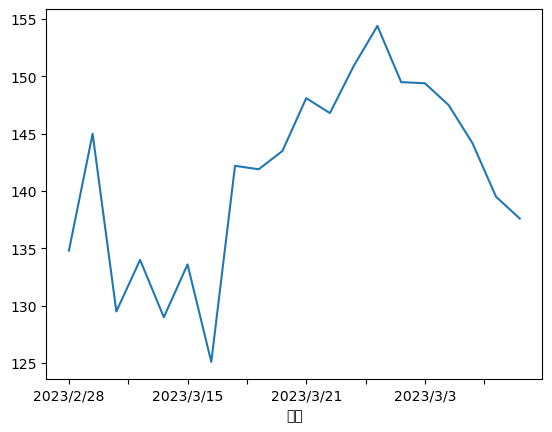

In [18]:
a = ser.loc['BAIDU']

In [20]:
# 多层索引，可以用元组的形式筛选
ser.loc[('BAIDU','2023/3/10')]
# ser.loc['BAIDU','2023/3/10']

129.5

In [22]:
ser.loc[:,'2023/3/10']

公司
BABA      82.96
BAIDU    129.50
JD        40.47
Name: 收盘, dtype: float64

三、df的多层索引MultiIndex

In [23]:
df.head()

,日期,公司,收盘,开盘,高,低,交易量,涨跌幅
0,2023/3/27,BABA,86.12,87.13,88.22,85.50,18.18M,-0.90%
1,2023/3/24,BABA,86.90,85.87,88.11,85.63,20.35M,0.44%
2,2023/3/23,BABA,86.52,87.68,88.38,85.26,26.79M,3.43%
3,2023/3/22,BABA,83.65,84.84,85.39,83.51,21.08M,-0.06%
4,2023/3/21,BABA,83.70,82.46,84.09,82.00,16.44M,3.33%


In [24]:
df.set_index(['公司','日期'],inplace=True)

In [25]:
df.head()

收盘     开盘      高      低     交易量     涨跌幅
公司   日期                                                   
BABA 2023/3/27  86.12  87.13  88.22  85.50  18.18M  -0.90%
     2023/3/24  86.90  85.87  88.11  85.63  20.35M   0.44%
     2023/3/23  86.52  87.68  88.38  85.26  26.79M   3.43%
     2023/3/22  83.65  84.84  85.39  83.51  21.08M  -0.06%
     2023/3/21  83.70  82.46  84.09  82.00  16.44M   3.33%

In [26]:
df.index

MultiIndex([( 'BABA', '2023/3/27'),
            ( 'BABA', '2023/3/24'),
            ( 'BABA', '2023/3/23'),
            ( 'BABA', '2023/3/22'),
            ( 'BABA', '2023/3/21'),
            ( 'BABA', '2023/3/20'),
            ( 'BABA', '2023/3/17'),
            ( 'BABA', '2023/3/16'),
            ( 'BABA', '2023/3/15'),
            ( 'BABA', '2023/3/14'),
            ( 'BABA', '2023/3/13'),
            ( 'BABA', '2023/3/10'),
            ( 'BABA',  '2023/3/9'),
            ( 'BABA',  '2023/3/8'),
            ( 'BABA',  '2023/3/7'),
            ( 'BABA',  '2023/3/6'),
            ( 'BABA',  '2023/3/3'),
            ( 'BABA',  '2023/3/2'),
            ( 'BABA',  '2023/3/1'),
            ( 'BABA', '2023/2/28'),
            (   'JD', '2023/3/27'),
            (   'JD', '2023/3/24'),
            (   'JD', '2023/3/23'),
            (   'JD', '2023/3/22'),
            (   'JD', '2023/3/21'),
            (   'JD', '2023/3/20'),
            (   'JD', '2023/3/17'),
            (   'JD', '2023/

四、df的多层索引怎么样筛选数据

**重要知识**在选择数据时：
- 元组(key1,key2)代表筛选多层索引，其中key1是索引第一级，key2是第二级，例如key1=JD,key2=2023/3/27
- 列表[key1,key2]代表同一层的多个key，其中key1和key2是并列的同级索引，比如key1=JD,key2=BAIDU

In [27]:
df.loc['BAIDU']

,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,
2023/3/27,149.5,156.9,157.0,147.4,15.52M,-3.17%
2023/3/24,154.4,148.5,159.0,148.0,25.84M,2.32%
2023/3/23,150.9,145.5,151.1,144.5,12.34M,2.79%
2023/3/22,146.8,147.9,149.8,145.8,8.86M,-0.88%
2023/3/21,148.1,146.2,149.3,143.5,13.13M,3.21%
2023/3/20,143.5,146.5,148.0,141.7,16.03M,0.91%
2023/3/17,142.2,135.0,146.0,134.0,32.59M,13.67%
2023/3/16,125.1,131.3,134.4,120.1,24.31M,-6.36%
2023/3/15,133.6,134.5,138.3,133.0,14.63M,3.57%


In [28]:
df.loc[('BAIDU','2023/3/9')]

收盘      137.6
开盘      140.0
高       141.0
低       137.4
交易量     6.51M
涨跌幅    -1.36%
Name: (BAIDU, 2023/3/9), dtype: object

In [32]:
df.loc[['BAIDU','JD'],:]

收盘      开盘       高       低     交易量      涨跌幅
公司    日期                                                        
BAIDU 2023/3/27  149.50  156.90  157.00  147.40  15.52M   -3.17%
      2023/3/24  154.40  148.50  159.00  148.00  25.84M    2.32%
      2023/3/23  150.90  145.50  151.10  144.50  12.34M    2.79%
      2023/3/22  146.80  147.90  149.80  145.80   8.86M   -0.88%
      2023/3/21  148.10  146.20  149.30  143.50  13.13M    3.21%
      2023/3/20  143.50  146.50  148.00  141.70  16.03M    0.91%
      2023/3/17  142.20  135.00  146.00  134.00  32.59M   13.67%
      2023/3/16  125.10  131.30  134.40  120.10  24.31M   -6.36%
      2023/3/15  133.60  134.50  138.30  133.00  14.63M    3.57%
      2023/3/14  129.00  132.30  134.00  128.50   8.23M   -3.73%
      2023/3/13  134.00  131.50  136.70  129.00  11.66M    3.47%
      2023/3/10  129.50  128.20  131.10  128.00  20.86M   -5.89%
      2023/3/9   137.60  140.00  141.00  137.40   6.51M   -1.36%
      2023/3/8   139.50  141.10  141.50  137.60   7.68M   -3.26%
      2023/3/7   144.20  147.50  149.30  142.30   9.00M   -2.24%
      2023/3/6   147.50  149.40  150.00  145.70   9.97M   -1.27%
      2023/3/3   149.40  148.30  150.80  146.60  13.38M    5.29%
      2023/3/2   141.90  141.00  142.60  139.40  16.49M   -2.14%
      2023/3/1   145.00  135.00  146.90  135.00  17.88M    7.57%
      2023/2/28  134.80  137.00  138.50  134.00  12.43M    0.60%
JD    2023/3/27   39.78   39.34   39.96   39.15   7.31M   -1.27%
      2023/3/24   40.29   39.92   40.84   39.85   7.35M    0.55%
      2023/3/23   40.07   40.30   40.89   39.63  11.04M    4.08%
      2023/3/22   38.50   39.50   39.87   38.50   8.27M   -2.63%
      2023/3/21   39.54   38.62   39.59   38.43   9.71M    2.28%
      2023/3/20   38.66   38.00   39.30   37.70  11.16M   -0.44%
      2023/3/17   38.83   39.48   39.67   38.57  11.48M   -2.41%
      2023/3/16   39.79   39.07   40.09   38.91   9.83M    1.14%
      2023/3/15   39.34   39.38   39.88   38.81  10.40M   -2.72%
      2023/3/14   40.44   39.98   40.81   39.46  10.78M    0.82%
      2023/3/13   40.11   39.68   40.84   39.04  13.14M   -0.89%
      2023/3/10   40.47   40.88   41.38   40.07  15.48M   -2.90%
      2023/3/9    41.68   44.51   44.79   41.31  37.10M  -11.28%
      2023/3/8    46.98   45.51   47.41   45.47   8.51M    0.88%
      2023/3/7    46.57   47.36   47.36   46.34   6.51M   -2.82%
      2023/3/6    47.92   47.67   48.72   47.23   7.17M    0.97%
      2023/3/3    47.46   47.36   48.22   47.32   7.87M    0.83%
      2023/3/2    47.07   45.62   47.15   45.40   7.90M    2.93%
      2023/3/1    45.73   46.54   46.77   45.30   9.24M    2.90%
      2023/2/28   44.44   44.28   45.11   43.97   6.44M   -0.67%

In [31]:
df.loc[(['BAIDU','JD'],'2023/2/28'),:]

,,收盘,开盘,高,低,交易量,涨跌幅
公司,日期,,,,,,
BAIDU,2023/2/28,134.80,137.00,138.50,134.00,12.43M,0.60%
JD,2023/2/28,44.44,44.28,45.11,43.97,6.44M,-0.67%


In [33]:
df.loc[(['BAIDU','JD'],'2023/2/28'),'收盘']

公司     日期       
BAIDU  2023/2/28    134.80
JD     2023/2/28     44.44
Name: 收盘, dtype: float64

In [36]:
df.loc[('BAIDU',['2023/2/28','2023/3/6']),'收盘']

公司     日期       
BAIDU  2023/2/28    134.8
       2023/3/6     147.5
Name: 收盘, dtype: float64

In [38]:
# slice(None)代表筛选这一索引的所有内容
df.loc[(slice(None),['2023/2/28','2023/3/6']),:]

,,收盘,开盘,高,低,交易量,涨跌幅
公司,日期,,,,,,
BABA,2023/2/28,87.79,88.46,89.34,87.27,24.60M,-1.64%
JD,2023/2/28,44.44,44.28,45.11,43.97,6.44M,-0.67%
BAIDU,2023/2/28,134.80,137.00,138.50,134.00,12.43M,0.60%
BABA,2023/3/6,89.62,89.58,91.30,88.03,16.98M,-0.09%
JD,2023/3/6,47.92,47.67,48.72,47.23,7.17M,0.97%
BAIDU,2023/3/6,147.50,149.40,150.00,145.70,9.97M,-1.27%


In [39]:
df.reset_index()

,公司,日期,收盘,开盘,高,低,交易量,涨跌幅
0,BABA,2023/3/27,86.12,87.13,88.22,85.50,18.18M,-0.90%
1,BABA,2023/3/24,86.90,85.87,88.11,85.63,20.35M,0.44%
2,BABA,2023/3/23,86.52,87.68,88.38,85.26,26.79M,3.43%
3,BABA,2023/3/22,83.65,84.84,85.39,83.51,21.08M,-0.06%
4,BABA,2023/3/21,83.70,82.46,84.09,82.00,16.44M,3.33%
5,BABA,2023/3/20,81.00,80.15,81.90,79.48,18.95M,-0.82%
6,BABA,2023/3/17,81.67,84.00,84.16,80.62,23.71M,-0.67%
7,BABA,2023/3/16,82.22,81.46,82.48,80.66,22.41M,0.87%
8,BABA,2023/3/15,81.51,81.55,82.54,80.15,20.86M,-2.79%
9,BABA,2023/3/14,83.85,82.86,83.91,82.16,19.05M,1.15%


In [40]:
df.head()

收盘     开盘      高      低     交易量     涨跌幅
公司   日期                                                   
BABA 2023/3/27  86.12  87.13  88.22  85.50  18.18M  -0.90%
     2023/3/24  86.90  85.87  88.11  85.63  20.35M   0.44%
     2023/3/23  86.52  87.68  88.38  85.26  26.79M   3.43%
     2023/3/22  83.65  84.84  85.39  83.51  21.08M  -0.06%
     2023/3/21  83.70  82.46  84.09  82.00  16.44M   3.33%